## **Project Final Report**

### **Names**
1. Dara Mandy
2. Nagato Fukuhara
3. Nina Liu
4. Yinze Zhao

## **Introduction**

Running an online game server means constantly balancing player experience with limited technical resources. If too many people are online at once, the server can lag or even crash. If very few people use the server, time and money are wasted maintaining unused capacity. At UBC, a research group led by Frank Wood operates a public Minecraft server to study how people play and interact in virtual worlds. To plan recruitment, schedule studies and provision hardware effectively, the team needs to understand what kinds of players join the server and how engaged those players become over time.

Players' subscription behaviour to game-related newsletters can be a way to measure player engagement in this case. These newsletters are important because they are a direct way to share updates, announcements, and research information to interested players. However, not all players decide to subscribe. Understanding which player characteristics are related to newsletter subscription can help game companies and researchers communicate with the right audience and design effective engagement strategies.

In this project, we focus on the players.csv dataset, which contains one row per player. Each row corresponds to a participant on the Minecraft research server and includes information describing that player’s participation in the project. Broadly, the variables in players.csv record players' playing duration in the server overall, additionally, with an indication of whether the player is subscribed to a game-related newsletter. Because this dataset summarizes behaviour at the player level, it is well-suited for studying differences between “more engaged” and “less engaged” players.

Our analysis is based on Question 1 from the project description. In this question, we investigate how well we can use the information stored in players.csv to predict a player’s overall level of engagement with the server. Concretely, we treat one response variable as a proxy for engagement, and we use certain remaining variables in players.csv as predictors. This allows us to ask: given what we know about players in this dataset, can we predict how engaged that player would be with the Minecraft server based on whether they're subscribed to game-related newsletters? Answering this question can help the research team identify which kinds of players are most likely to become active participants and may guide future recruitment or design decisions.

In the rest of the report, we describe how we clean and wrangle players.csv, explore the relationships between engagement and other player characteristics, and build a predictive model to address Question 1. We then evaluate the model’s performance and discuss what our findings suggest about player behaviour on the Minecraft research server.

### Question

Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? (Question 1)

Specific: Can a game player's playing duration, age, and experience level predict if they will subscribe to a game-related newsletter?

To address this question, we focus on the players.csv dataset, which contains all the variables required: the subscription variable as our response and playing duration (total hours played), age, and player experience as the main predictors in a K-Nearest Neighbors classification model. More information is written in the Methods & Results.

### Data Description

### players.csv

This data shows all unique players, including data about each player like their experiences, behaviours, names, genders, and ages. The data has a total of 196 observations and 7 variables. The variables are as listed below:

| **Variable**   | **Type** | **Description**            | 
|----------------|----------|----------------------------|
| `experience`   | chr      | Level of players in game, for example: Amateur, Beginner, Regular, Pro, Veteran. |           
| `subscribe`    | lgl      | Indicates whether the player is subscribed to a game-related newsletter.|           
| `hashedEmail`  | chr      | Player email.|           
| `played_hours` | dbl      | Indicates how long the player has played the game.|          
| `name`         | chr      | Player's name.|           
| `gender`       | chr      | Player's gender.|           
| `age`          | dbl      | Player's age.|     

Age, experience level, email address, and gender were collected through self-reporting when signing up. Playtime was automatically collected through the game server.

## **Methods & Results**

### 1) Reading, Cleaning, and Wrangling the Data.

First, we begin the exploratory data analysis and visualization by loading the dataset into our notebook. In this case, we are going to use `read_csv` because it's a comma-separated values file (players.csv). Then, we apply the wrangling methods to our data frame, such as removing missing values and unnecessary variables, and changing certain variables' types if needed.

### 2) Exploratory Data Analysis

Second, we visualized the dataset to understand patterns and distributions. Which includes:
- Plotting scatter plots of age and hours played
- Creating bar charts for subscription rates
- Comparing characteristics among different player types. This will help us identify relationships worth testing further

### 3) Classification

Third, we are addressing a predictive question with a categorical response variable (subscribe). Hence, we are going to use K-NN classification to predict the answer to the question.

**Data Splitting**

To continue, we are going to split the data to build the predictive model, which includes:
- A training set used to fit our model
- A test set used to evaluate model performance on unseen data

**Predictors**

Next, the predictors that we are going to use to predict whether a player subscribes to the newsletter, as follows:
- hours played
- age
- experience level
  * This was mutated to change experience (previously a character, mutated to a factor) to be numerical in order to use K-NN classification, creating almost a hierarchy, where low experience (i.e. Beginner) --> 1, and higher experience (i.e. Veteran) --> 5

We decided to omit gender since our model performance (accuracy, precision, recall, confusion matrix) does not improve much when gender is included. K-NN may not perform as well if there are too many predictors, and gender may contribute to a decrease in performance by adding unnecessary complexity.

**Model Evaluation**

The metrics that we are going to use to evaluate the model performance are:
- Accuracy
- Confusion matrices
- Recall
- Precision

We decided to use the last 3 listed methods to further evaulate model performance since we are performing classification on a dataset with class imbalance.

**Key Findings**

We will identify which player characteristics contribute most strongly to predicting newsletter subscription.

In [1]:
# run this!

library(tidyverse)
library(repr)
library(tidymodels)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Loading in data

players_data <- read_csv("players.csv")
head(players_data)

nrow(players_data)
ncol(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

In [3]:
# Players summary statistics

glimpse(players_data)
summary(players_data)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [4]:
# Players summary statistics

players_data %>% summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    total_players = n(),
    subscribe_count = sum(subscribe == "TRUE", na.rm = TRUE),
    percentage_subscribe = subscribe_count / total_players * 100) %>%
    round(2)

mean_played_hours,mean_age,median_played_hours,total_players,subscribe_count,percentage_subscribe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,0.1,196,144,73.47


In [7]:
# Wrangling players data

players <- players_data |>
    select(-hashedEmail, -gender, -name) |> 
    filter(!is.na(Age)) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(experience = as_factor(experience)) |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")),
           experience = as.numeric(experience))
head(players)

experience,subscribe,played_hours,Age
<dbl>,<fct>,<dbl>,<dbl>
4,TRUE,30.3,9
5,TRUE,3.8,17
5,FALSE,0.0,17
2,TRUE,0.7,21
3,TRUE,0.1,21
2,TRUE,0.0,17


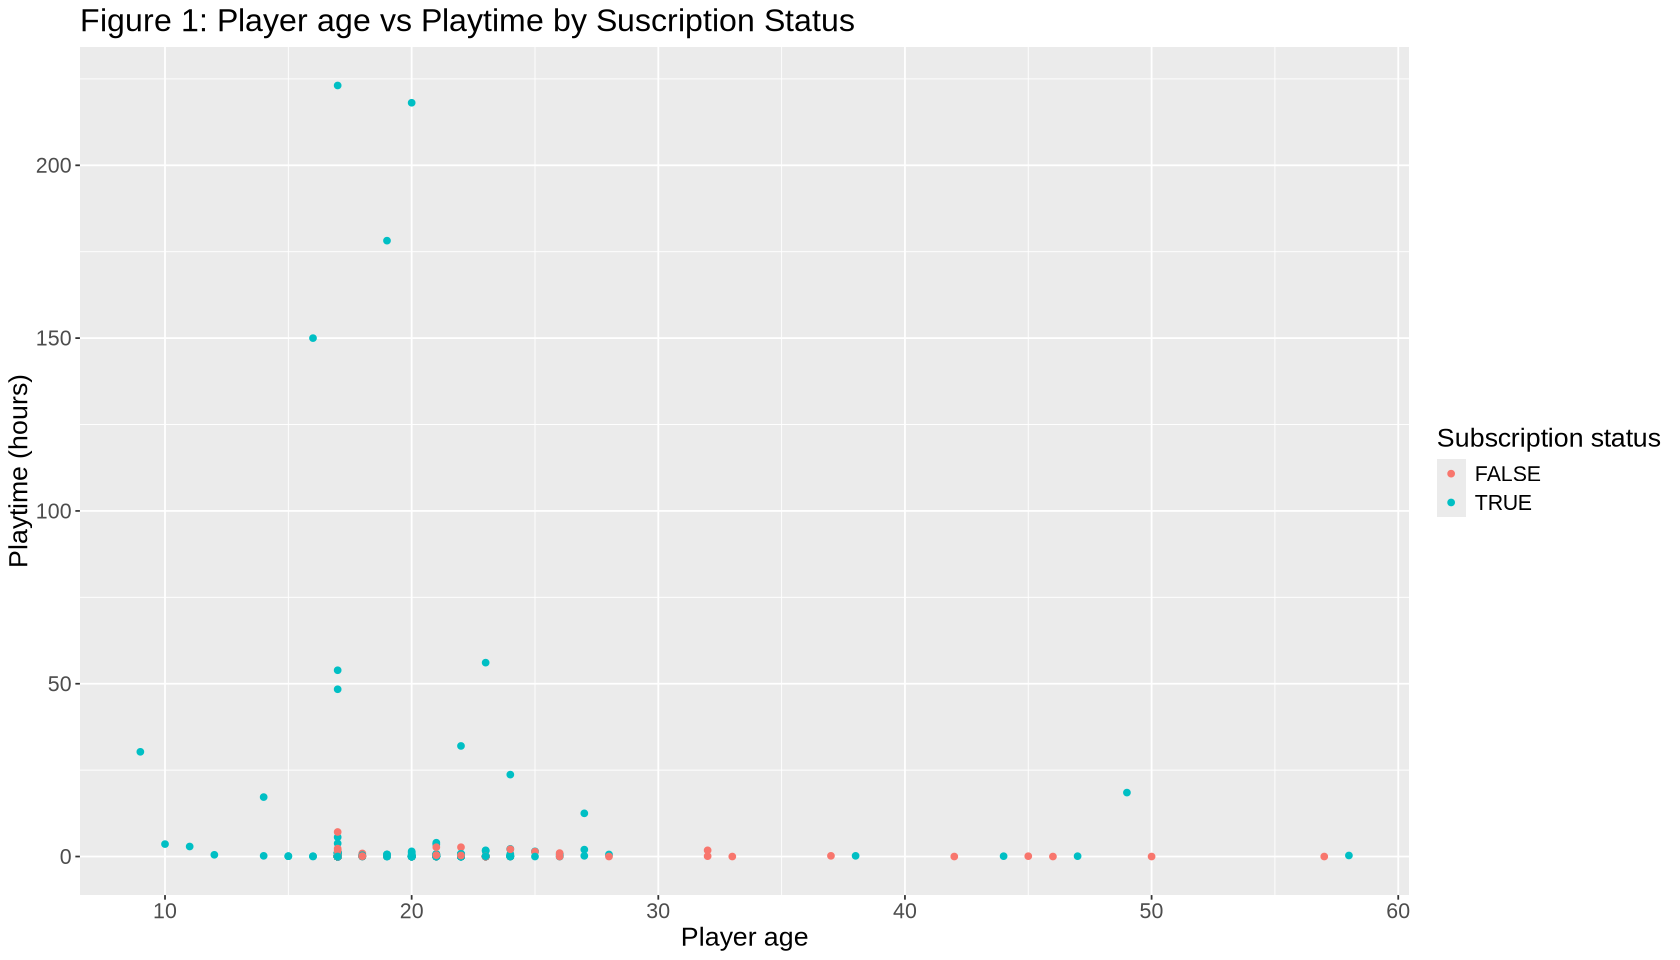

In [8]:
# Scatterplot of age vs playtime
options(repr.plot.width = 14, repr.plot.height = 8)

age_v_playtime <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
        geom_point() +
        labs(x = "Player age",
             y = "Playtime (hours)",
             title = "Figure 1: Player age vs Playtime by Suscription Status",
             color = "Subscription status") +
        theme(text = element_text(size = 16))
age_v_playtime

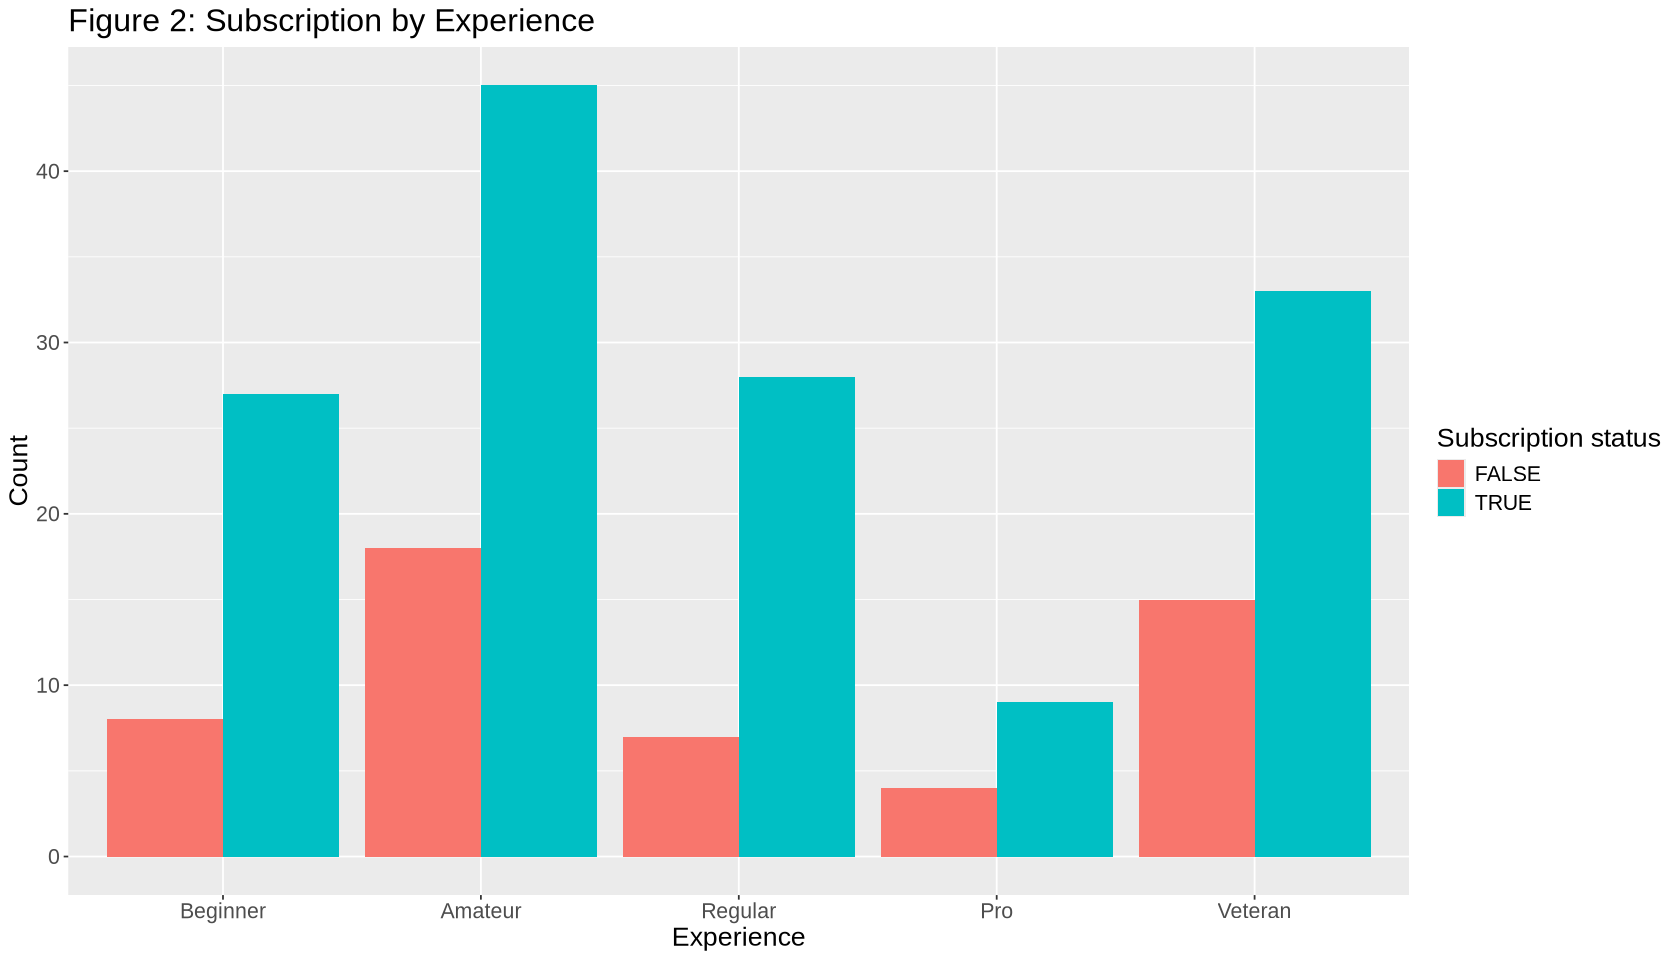

In [9]:
# Barplot of Subscription by Experience
players_temp <- players |>
    mutate(experience = as_factor(experience)) |>
    mutate(experience = fct_recode(experience, Beginner = "1", Amateur = "2", Regular = "3", Pro = "4", Veteran = "5"))

experience_and_sub <- players_temp |>
    ggplot(aes(x = experience, fill = subscribe)) +
        geom_bar(position = "dodge") +
        labs(x = "Experience", y = "Count", title = "Figure 2: Subscription by Experience", fill = "Subscription status") +
        theme(text = element_text(size = 16))
experience_and_sub

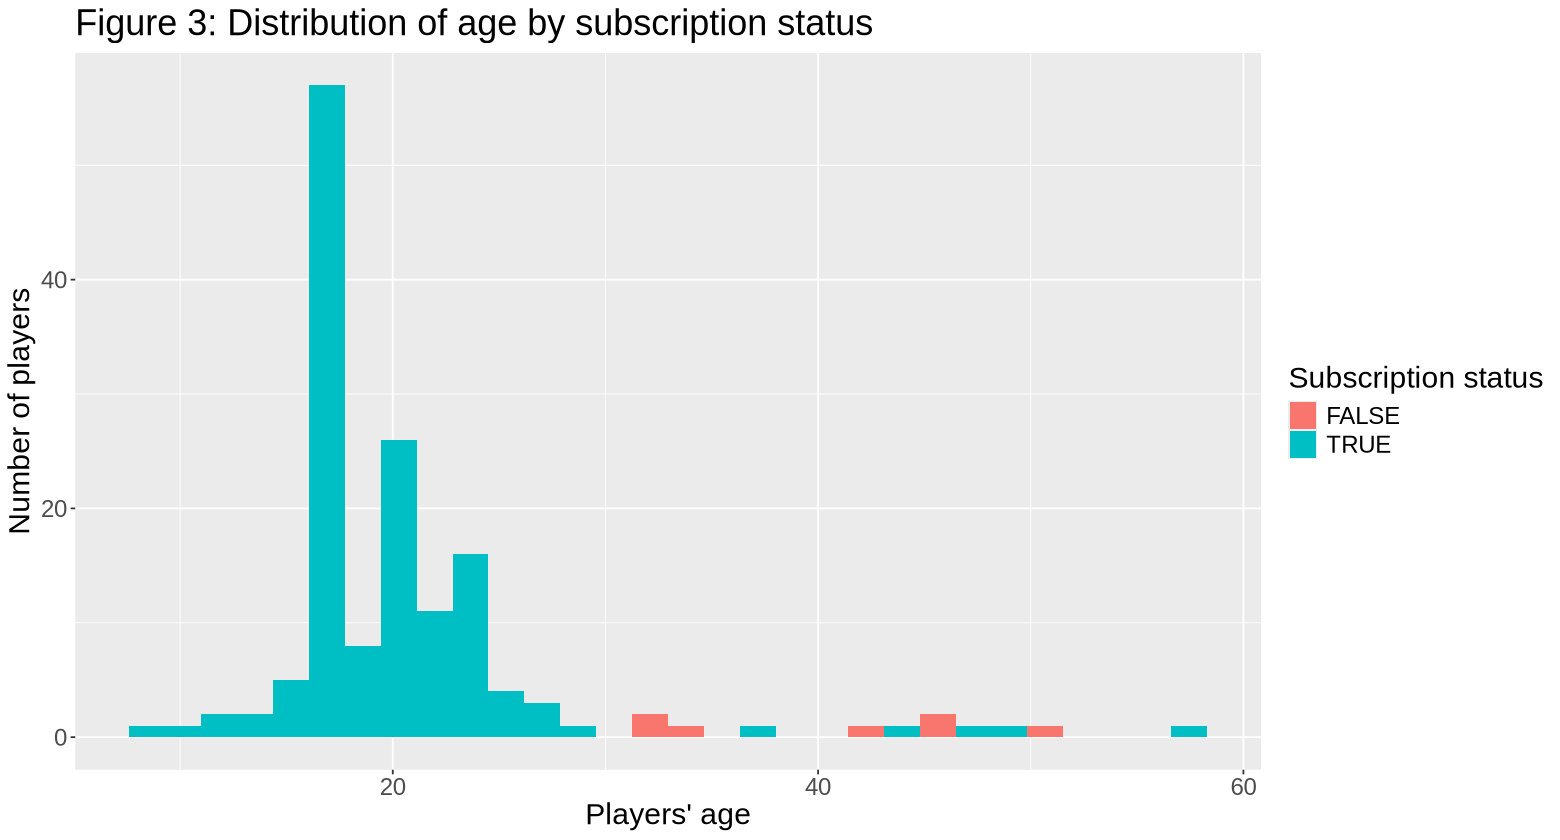

In [10]:
# Histogram of age and subscription status
options(repr.plot.width = 13, repr.plot.height = 7)

age_v_sub <- players |>
    ggplot(aes(x = Age, fill = subscribe)) +
        geom_histogram(position = "identity", bins = 30) +
        labs(x = "Players' age",
             y = "Number of players",
             title = "Figure 3: Distribution of age by subscription status",
             fill = "Subscription status") +
        theme(text = element_text(size = 18))
age_v_sub

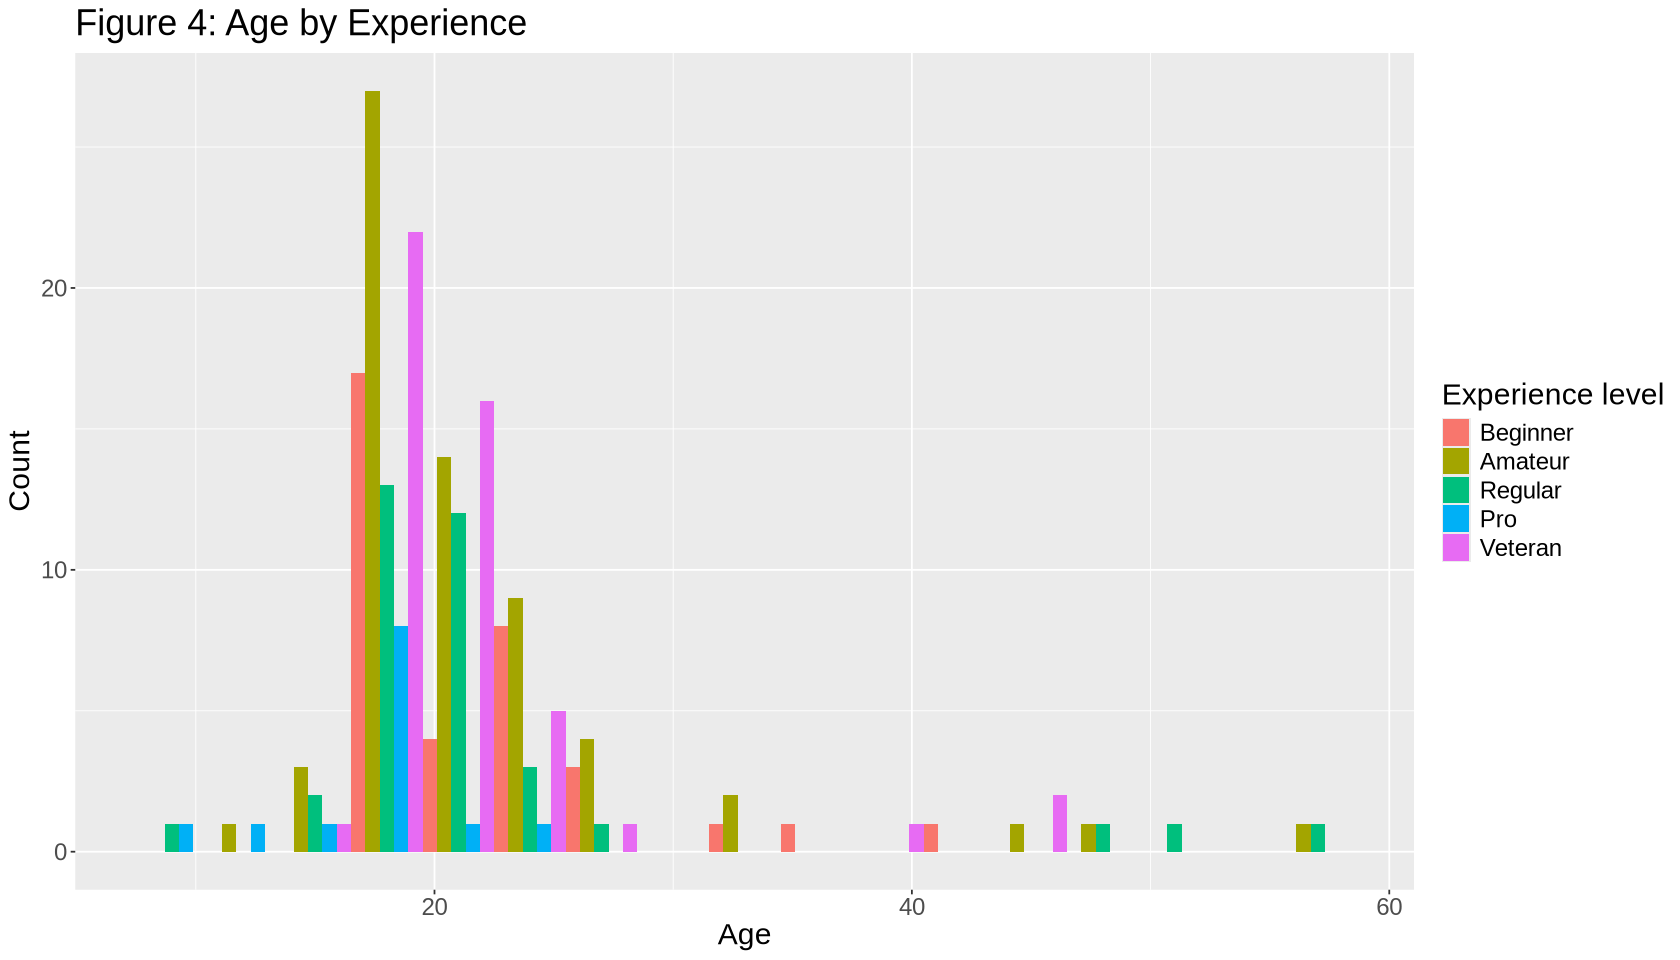

In [11]:
# age by experience?
options(repr.plot.width = 14, repr.plot.height = 8)

experience_and_age <- players_temp |>
    ggplot(aes(x = Age, fill = experience)) +
        geom_histogram(position = "dodge", binwidth = 3) +
        labs(x = "Age", y = "Count", title = "Figure 4: Age by Experience", fill = "Experience level") +
        theme(text = element_text(size = 18))
experience_and_age

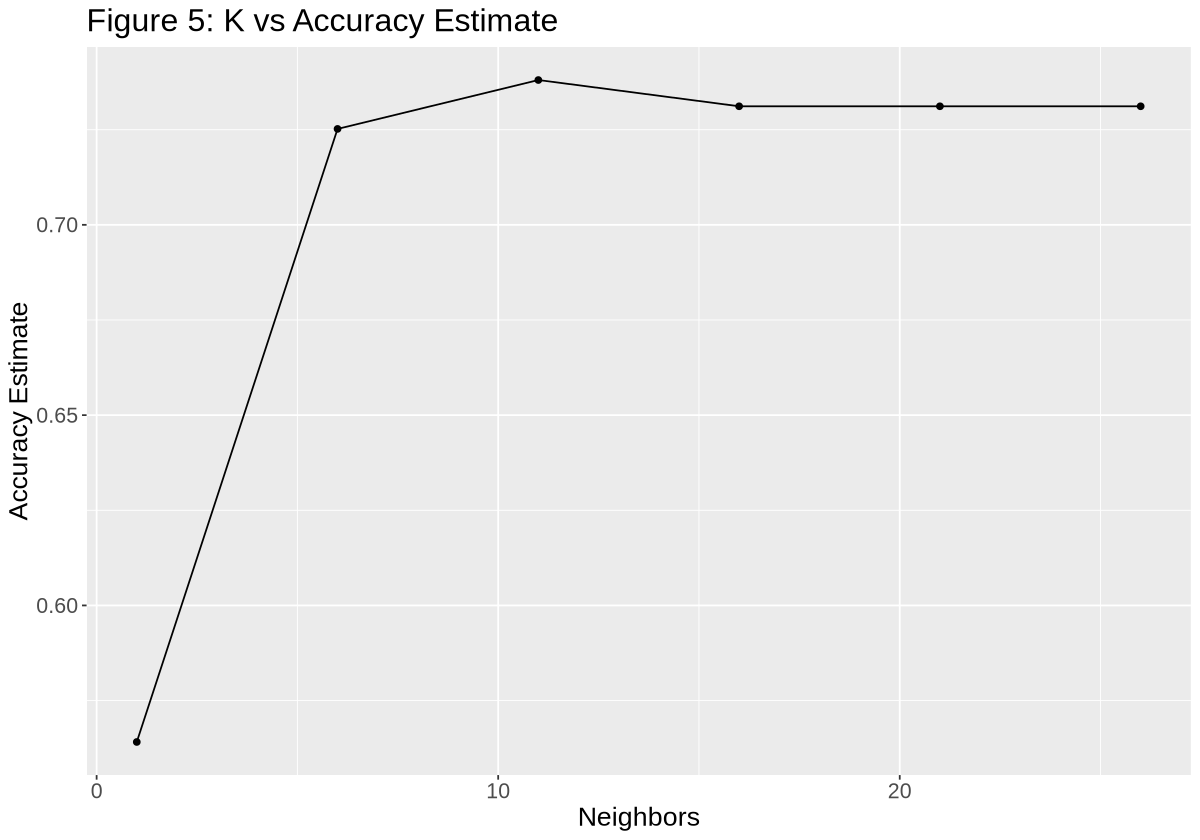

In [12]:
set.seed(9999)
options(repr.plot.width = 10, repr.plot.height = 7)

# Splitting data for classification
players_split <- initial_split(players, prop = 0.75, strata = subscribe) 
players_train <- training(players_split)
players_test <- testing(players_split)

# Recipe and model specification 
players_recipe <- recipe(subscribe ~ ., data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(over_ratio = 1, skip = FALSE)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Cross-validation
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 5))

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()
                 
results <- players_fit |>
    filter(.metric == "accuracy")

accuracy_v_k <- results |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 5: K vs Accuracy Estimate") +
        theme(text = element_text(size = 16))
accuracy_v_k

In [35]:
best_k <- results |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)

players_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit_2 <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec_2) |>
    fit(data = players_train)

players_test_predictions <- predict(players_fit_2, players_test) |>
  bind_cols(players_test)

players_test_predictions |> pull(subscribe) |> levels()

# accuracy
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

# precision
precision_prediction <- players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")
precision_prediction

# recall
recall_prediction <- players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")
recall_prediction

# confusion matrix
confusion <- players_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion

[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.755102


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


          Truth
Prediction FALSE TRUE
     FALSE     1    0
     TRUE     12   36

## **Discussion**

In this analysis, we investigated the factors that could potentially influence whether players chose to subscribe to a game-related newsletter, including their age, playing duration, and experience level. Additionally, analyzing the players.csv dataset and creating exploratory visualizations allowed us to better understand patterns between players. 

In Figure 1 (scatterplot of Age vs Playtime, colour-coded by subscription status), the plot suggests a very weak negative relationship, where playtime somewhat decreases as age increases. Also, most data is clustered at ages below 30, showing that most players who play/log more hours are relatively young. In relation to subscription, a subscription status of TRUE (player is subscribed) was slightly associated with higher playtime. Overall, for most players, regardless of age and subscription status, low playtime was a common trend.

Figure 2 displays the number of players who are (TRUE) and are not (FALSE) subscribed to a game-related newsletter, based on experience level (Beginner, Amateur, Regular, Pro, Veteran). From the bar plot, it was seen that the Amateur level has the highest amount of players who are subscribed, followed by Veteran, Regular, Beginner, and Pro. The number of players who were not subscribed follow a similar pattern, with Beginner switching places with Regular. Overall, it seems that most players who subscribe to game-related newsletters have a lower experience level.

In Figure 3, we observed that a large majority of players are young (below age 30), which may potentially limit the predictive strength of age. Furthermore, subscription is associated with younger players, with a FALSE subscription status (not subscribed) only seen in ages above 30. It is also noteworthy that FALSE is seen very little in comparison to TRUE.

Figure 4 illustrates the number of players by age and what their experience level is. The plot shows that a large number of young players (below age 30) are amateurs. Other experience levels that had quite a large number of *young* players were Veteran and Beginner.

Generally, the findings from exploratory data analysis show that most players are young, at the Amateur level, and don't play a large amount of hours.

A K-NN classifier was used to answer our question. Notably, the dataset showed a clear class imbalance, with substantially more subscribed players (TRUE) than non-subscribed players (FALSE), which could be seen in Figure 3. This imbalance had a large impact on model performance.

Without addressing the imbalance, the model using K = 11 (selected by using Figure 5) achieved about 73% accuracy, 0.73 precision, and perfect (1) recall for the subscribed class. After applying `step_upsample()` to balance the training data, accuracy and precision increased slightly (about 0.755 and 0.75, respectively), while recall remained the same. The confusion matrix revealed that although the model correctly identified all subscribed players, it misclassified most non-subscribed players as subscribed, producing many false positives and only 1 true negative. Upsampling helped very slightly by reducing some false-positive predictions, but not enough to improve the classifier's ability to distinguish between subscribed and unsubscribed players.

Overall, the classifier is not the best since it performs poorly at identifying non-subscribers. Class imbalance plays a major role in limiting the classifier's performance.

These results were mostly in line with expectations, as exploratory data analysis revealed a large class imbalance, and since we were using a few basic features, it was anticipated that K-NN might have difficulty. This could mean that solely relying on basic metrics when creating player engagement strategies may not be sufficient. Extra, possibly more important variables, such as in-game achievements, social factors, and past subscription history, may better explain why some players subscribe while others do not. This may lead to future questions about which of these variables are most predictive of subscription behaviour. Ultimately, gaining a deeper understanding of the factors that influence player subscription behaviour will likely guide future recruitment and design decisions.

## **References**

https://rdrr.io/r/base/factor.html

https://themis.tidymodels.org/reference/step_upsample.html